# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [14]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
city_url = f"{url}appid={weather_api_key}&units={units}&q="

In [16]:
# Request
request = requests.get(city_url + city)
json_request = request.json()
print(json.dumps(json_request, indent=4))

{
    "coord": {
        "lon": 128.8694,
        "lat": 71.6872
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": -21.73,
        "feels_like": -34.33,
        "temp_min": -21.73,
        "temp_max": -21.73,
        "pressure": 1019,
        "humidity": 99,
        "sea_level": 1019,
        "grnd_level": 1013
    },
    "visibility": 6563,
    "wind": {
        "speed": 6.29,
        "deg": 252,
        "gust": 6.02
    },
    "clouds": {
        "all": 98
    },
    "dt": 1638240300,
    "sys": {
        "country": "RU",
        "sunrise": 0,
        "sunset": 0
    },
    "timezone": 32400,
    "id": 2015306,
    "name": "Tiksi",
    "cod": 200
}


In [18]:
# Define Variables
city_name = []
lat = []
lon = []
max_temp = []
humid = []
clouds = []
wind_speed = []
country = []
date = []
city_count = 0
set_number = 1

print(f'Beginning Data Retrieval')
print(f'------------------------')

for index, city in enumerate(cities, start = 1):
    try:
        weather_response = requests.get(city_url + city).json()
        city_name.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])     
        max_temp.append(weather_response['main']['temp_max'])
        humid.append(weather_response['main']['humidity'])
        clouds.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        
        if city_count > 49:
            city_count = 0
            set_number += 1
        
        else:
            city_count += 1
        
        print(f'Processing Record {city_count} of Set {set_number} : {city}')

    except(KeyError, IndexError):
        print('City not found. Skipping...') 
        
    continue


print(f'-----------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 : bluff
City not found. Skipping...
Processing Record 2 of Set 1 : castro
Processing Record 3 of Set 1 : tasiilaq
Processing Record 4 of Set 1 : tutoia
City not found. Skipping...
Processing Record 5 of Set 1 : atuona
Processing Record 6 of Set 1 : rikitea
Processing Record 7 of Set 1 : lebu
Processing Record 8 of Set 1 : buala
Processing Record 9 of Set 1 : atar
City not found. Skipping...
Processing Record 10 of Set 1 : qaanaaq
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : port elizabeth
Processing Record 13 of Set 1 : barrow
Processing Record 14 of Set 1 : miragoane
Processing Record 15 of Set 1 : chichimila
Processing Record 16 of Set 1 : ushuaia
Processing Record 17 of Set 1 : nyurba
Processing Record 18 of Set 1 : tuatapere
Processing Record 19 of Set 1 : vao
Processing Record 20 of Set 1 : hobart
Processing Record 21 of Set 1 : kapaa
Processing Record 22 of Set 1 : kathmandu


In [ ]:
# responses= []
# for city in cities:
#     try:
#         weather_response = requests.get(city_url + city).json()
#         responses.append(weather_response)
#         print('It is working') 
#     except:
#         print('City not found. Skipping...') 
        
# responses[1]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#Create a dataframe using information from data retrieval
weather_df = pd.DataFrame({ "City" : city_name, "Lat" : lat,
                            "Lng" : lon, "Max Temp" : max_temp,
                            "Humidity" : humid, "Cloudiness" : clouds,
                            "Wind Speed" : wind_speed, "Country" : country,
                            "Date" : date })
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,61.81,75,93,8.66,NZ,1638240372
1,Castro,-24.7911,-50.0119,62.24,89,64,3.38,BR,1638240373
2,Tasiilaq,65.6145,-37.6368,21.36,92,92,4.72,GL,1638240373
3,Tutóia,-2.7619,-42.2744,80.78,81,23,12.10,BR,1638240374
4,Atuona,-9.8000,-139.0333,79.00,76,3,22.08,PF,1638240374


city_name = []
lat = []
lon = []
max_temp = []
humid = []
clouds = []
wind_speed = []
country = []
date = []

In [60]:
# Export csv
weather_df.to_csv("../output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [63]:
#  Get the indices of cities that have humidity over 100%.
hundred_df = weather_df[weather_df['Humidity'] > 0]
hundred_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,61.81,75,93,8.66,NZ,1638240372
1,Castro,-24.7911,-50.0119,62.24,89,64,3.38,BR,1638240373
2,Tasiilaq,65.6145,-37.6368,21.36,92,92,4.72,GL,1638240373
3,Tutóia,-2.7619,-42.2744,80.78,81,23,12.10,BR,1638240374
4,Atuona,-9.8000,-139.0333,79.00,76,3,22.08,PF,1638240374


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

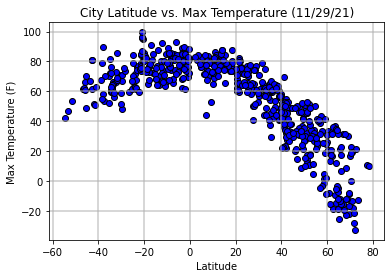

In [64]:
plt.scatter(weather_df
            ["Lat"], weather_df["Max Temp"], color = "blue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

plt.savefig("../output_data/City_Latitude_vs_Temperature.png")

This plot represents the comparison between 597 random cities. It analyzes latitude and the maximum temperature in fahrenheit for these cities.

## Latitude vs. Humidity Plot

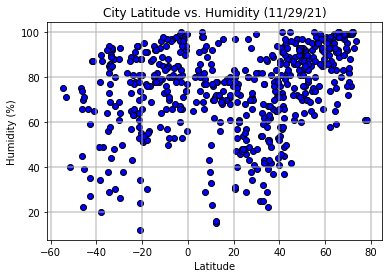

In [81]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color = "blue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

plt.savefig("../output_data/City_Latitude_vs_Humidity.png")

This plot represents the comparison between 597 random cities. It analyzes latitude and the humidity percentage for these cities.

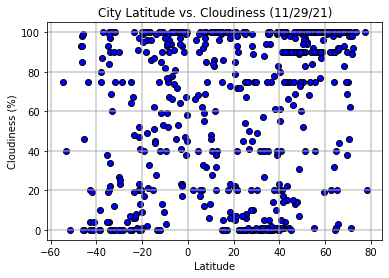

In [66]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color = "blue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

This plot represents the comparison between 597 random cities. It analyzes latitude and the cloudiness percentage for these cities.

## Latitude vs. Wind Speed Plot

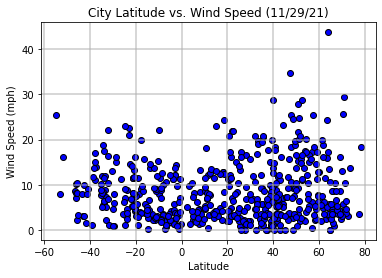

In [67]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = "blue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)

plt.savefig("../output_data/City_Latitude_vs_WindSpeed.png")

This plot represents the comparison between 597 random cities. It analyzes latitude and the humidity wind speed in mph for these cities.

## Linear Regression

In [36]:
northern_df = weather_df[weather_df['Lat'] >= 0]
southern_df = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7731601750798915


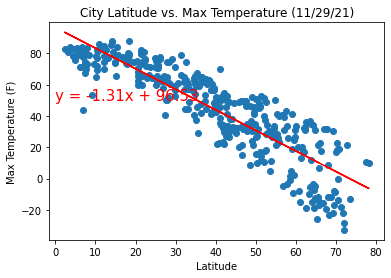

<Figure size 432x288 with 0 Axes>

In [68]:
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../output_data/City_Latitude_vs_MaxTemp_North.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.30319520657222987


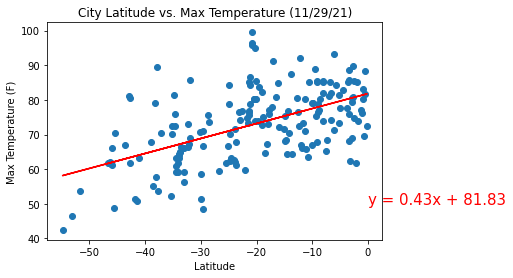

<Figure size 432x288 with 0 Axes>

In [69]:
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../output_data/City_Latitude_vs_MaxTemp_South.png")

These plots represent the comparison between 597 random cities in the Northern and Southern hemispheres. In both plots you can see that as you get closer to the equator, the temperature rises.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.16095308672700312


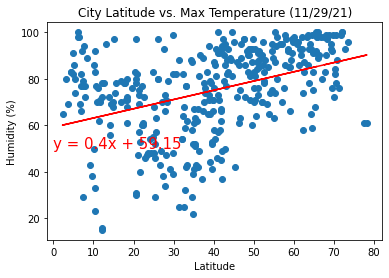

<Figure size 432x288 with 0 Axes>

In [70]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../output_data/City_Latitude_vs_Humidity_North.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.11969975541076978


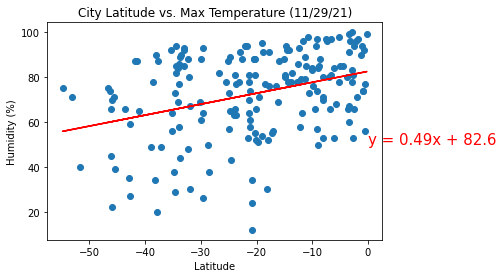

<Figure size 432x288 with 0 Axes>

In [71]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("City Latitude vs. Max Temperature (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../output_data/City_Latitude_vs_Humidity_South.png")

These plots represent the comparison between 597 random cities in the Northern and Southern hemispheres. In both plots, you can see that there are many outliers that can lead to a hypothesis that distance to the equator might not affect the humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07892211307520643


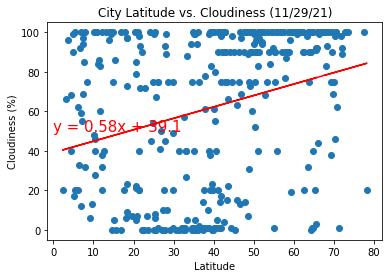

<Figure size 432x288 with 0 Axes>

In [73]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../output_data/City_Latitude_vs_Cloudiness_North.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07759070119637917


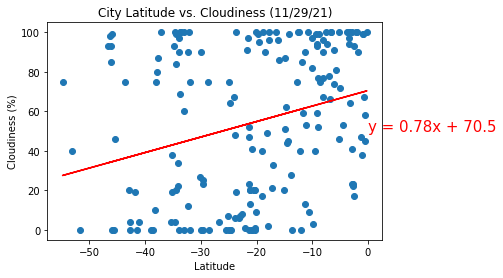

<Figure size 432x288 with 0 Axes>

In [74]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("City Latitude vs. Cloudiness (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../output_data/City_Latitude_vs_Cloudiness_South.png")

These plots represent the comparison between 597 random cities in the Northern and Southern hemispheres. In both plots, you can see that there are many outliers that can lead to a hypothesis that distance to the equator might not affect the cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.021215180441687142


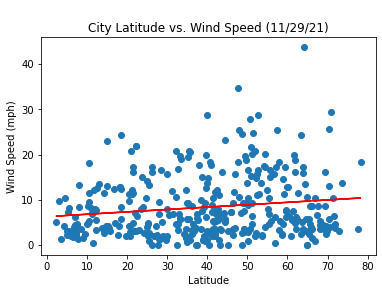

<Figure size 432x288 with 0 Axes>

In [75]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../output_data/City_Latitude_vs_WindSpeed_North.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06960188712744826


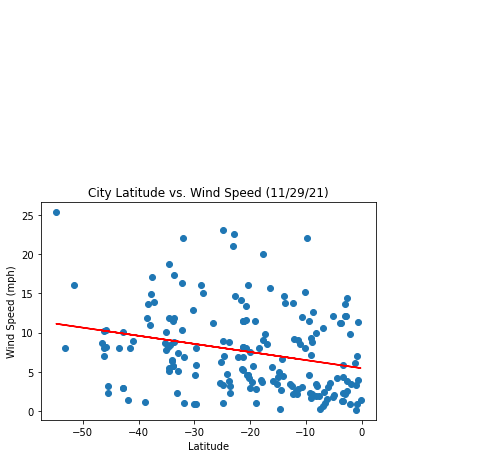

<Figure size 432x288 with 0 Axes>

In [76]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title("City Latitude vs. Wind Speed (11/29/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("../output_data/City_Latitude_vs_WindSpeed_South.png")

These plots represent the comparison between 597 random cities in the Northern and Southern hemispheres. In both plots you can see that as you get closer to the equator, the wind speeds slow down.